In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import sympy
from typing import List, Dict, Any

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from symreg import Problem
from symreg import Solution
from symreg import Promising_solution
sympy.init_printing()

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


---------------------------------- Hypergeometrical functions ----------------------------------

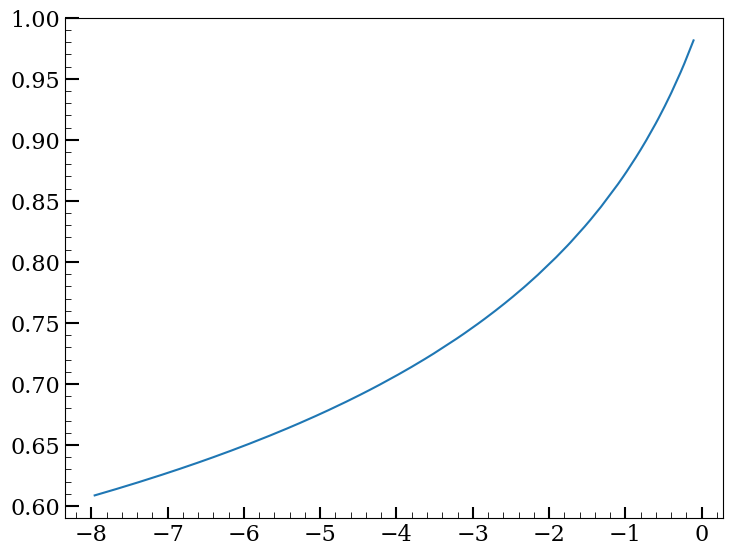

In [77]:
np.random.seed(42) #Keeping the seed for reproducibility


x_prime_dstrn_train = np.sort(np.random.uniform(-8.0, -0.0016, 200)) 
# Training data from uniform distribution
x_prime_dstrn_test = np.sort(np.random.uniform(-8.0, -0.0016, 200))

target_train = special.hyp2f1(1/3, 1, 11/6, x_prime_dstrn_train)
target_test = special.hyp2f1(1/3, 1, 11/6, x_prime_dstrn_test)

plt.plot(x_prime_dstrn_train, target_train)

#hypergeom function defined only for x < 0, the limiting values are 1 and 0 (later on we try to achieve these)

In [78]:
# Define problem for SR optimization, PyOperon works best with RMSE.
# The main constraining parameter is time (in sec), so the other
# parameters are set to very high values, so that the optimization
# is not limited by them.
# The maximum length of the expression is set to 50, which is a common value

hypergeom_args = {
    'allowed_symbols': "add,sub,mul,aq,constant,variable",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*5,
    'n_threads': 12,
    'tournament_size':2
}

Problem_hypergeom = Problem("Hypergeometric Function Problem", (x_prime_dstrn_train, target_train), (x_prime_dstrn_test, target_test), hypergeom_args)

In [79]:
# Solve the problem using PyOperon

Problem_hypergeom.solve()
print(f"number of solutions: {len(Problem_hypergeom.solutions)}")

[0.026261799037456512, 5.0], 194.46, (0.900047898293 + (0.080883383751 * (0.512548387051 * X1))), 0.00
[0.00613907165825367, 7.0], 204.50, (0.966377377510 + (0.030417833477 * ((2.908958673477 * X1) / (sqrt(1 + (0.220924213529 * X1) ^ 2))))), 0.00
[0.0018075696425512433, 9.0], 205.57, (0.424429416656 + (1.407351374626 * (5.756606578827 / (sqrt(1 + ((3.636248826981 * X1) - 14.313263893127) ^ 2))))), 0.00
[0.0003617208276409656, 11.0], 216.24, (0.997058629990 + ((-0.109473921359) * (((-0.081111580133) * X1) - ((10.587659835815 * X1) / (sqrt(1 + ((2.721460103989 * X1) - 7.287943363190) ^ 2)))))), 0.00
[0.00020439934451133013, 13.0], 221.61, (1.161746501923 + ((-4.877911090851) * (((0.361686378717 / (sqrt(1 + (0.318309873343 * X1) ^ 2))) + ((-0.463060408831) * X1)) / (sqrt(1 + ((2.886050939560 * X1) - 10.700503349304) ^ 2))))), 0.00
[0.0002041586849372834, 15.0], 239.66, ((-48.762832641602) + ((-4.925038814545) * ((((0.358606874943 / (sqrt(1 + (0.318309873343 * X1) ^ 2))) + ((-0.45877164602

<Axes: title={'center': 'Hypergeometric Function Problem: solution 3 Train'}>

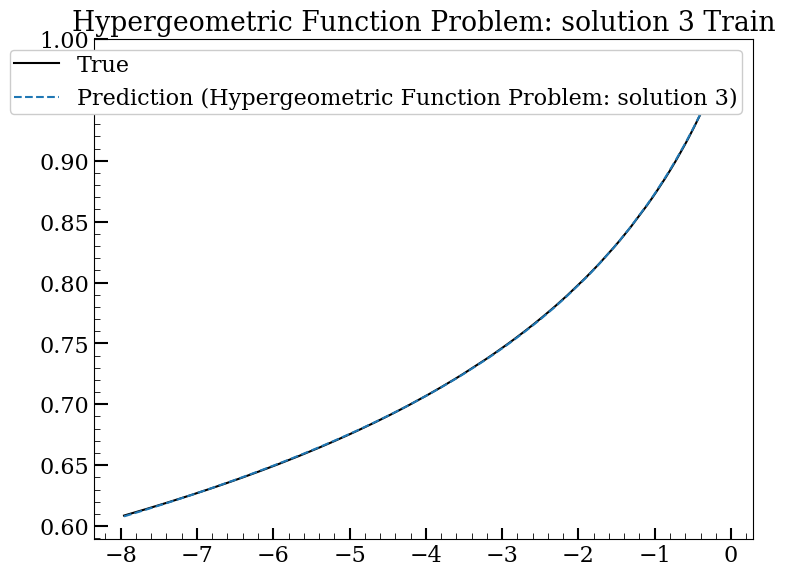

In [80]:
# Display and iterate through the solutions

Problem_hypergeom.solutions[3].plot_results()

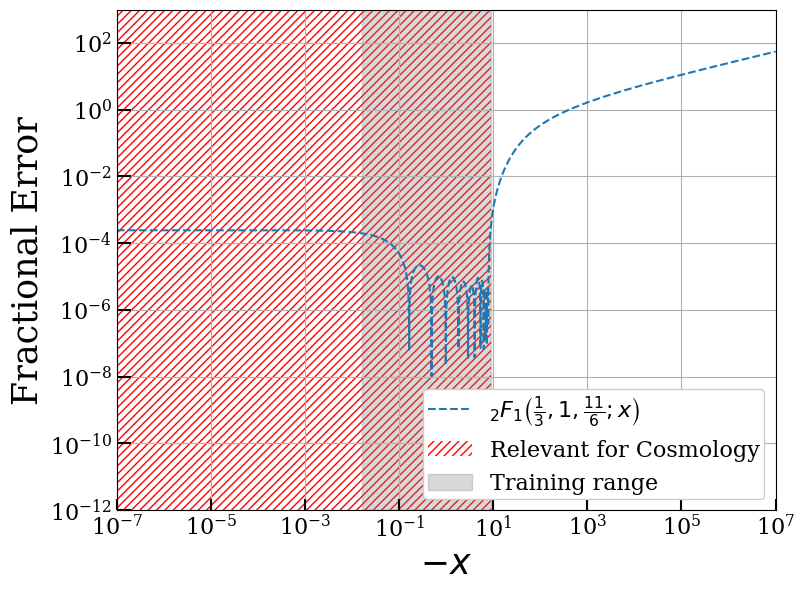

In [81]:
# Defining the metric that we want look at,
# in this case it is the fractional error of the hypergeometric function

coeff = [1/3, 1, 11/6]  
# Coefficients for the hypergeometric function for the growth factor
x_val = -1.0 * np.geomspace(10**(-7),10**7, 10000)
# Geomspace, so on the logarithmic scale we have equal spacing
Problem_hypergeom.solutions[-1].plot_fractional_error_hypergeom(x_val, coeff)

plt.savefig("Fractional_error_hypergeom_raw.pdf", dpi=450)
#plt.savefig("/home/danielct/Pictures/oxford_internship/fractional_error_growth_factor_5min_run_sol_5.pdf", dpi=300, bbox_inches='tight')

<Axes: title={'center': 'Hypergeometric Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

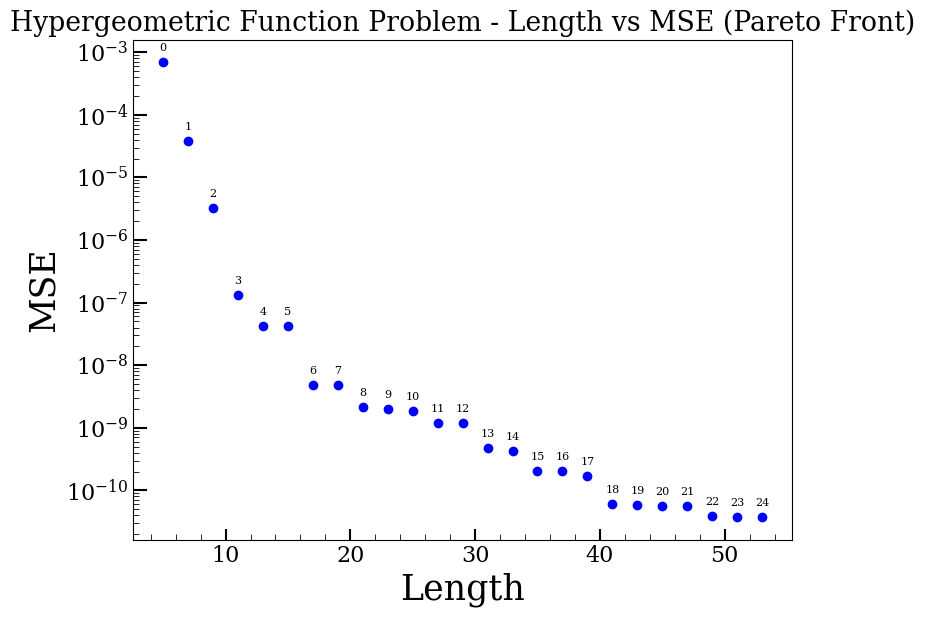

In [82]:
# Pareto front for the solutions

Problem_hypergeom.plot_l_vs_mse()

In [83]:
# Saving the solutions to LaTeX format for later use

Problem_hypergeom.export_solutions_to_latex(n=20)

LaTeX file written to latex_files/Hypergeometric_Function_Problemno_solutions_20/solutions.tex


In [84]:
# Iterating and displaying the solutions

k=4
Problem_hypergeom.solutions[k].display_expression()
b_vals = Problem_hypergeom.solutions[k].extract_and_format()[1]
b_vals

<IPython.core.display.Math object>

{'b0': 2.25876750397083,
 'b1': 8.329290025734736,
 'b2': 61.76439549004863,
 'b3': 115.5007719284622,
 'b4': 1.1617465019230622,
 'b5': 1.764273998153385,
 'b6': 0.10132117546763197}

In [85]:
# Computing the limits of our approximation
# Once again, the limiting values are 1 (for x --> 0) and 0 (x --> -inf)

Problem_hypergeom.solutions[k].compute_limits(0).evalf(), Problem_hypergeom.solutions[k].compute_limits(-np.inf).evalf()

In [ ]:
# Defining class that will for now be storing expressions for another 
# analysis and reoptimization of the solution

from symreg import Promising_solution
Promising_solution_0_limits = Promising_solution(Problem_hypergeom.solutions[k].sympy_expr, (x_prime_dstrn_train, target_train), Problem_hypergeom.solutions[k], b_vals)

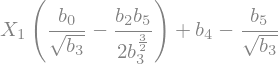

In [87]:
# Computing expansion at x = 0 up to two order terms (n=2)
# This part is crucial, as for some solutions (pow, log)  quite often the 
# expansion cannot be computed. 

expansion = Promising_solution_0_limits.compute_expansion_at_val(0, n=2)
expansion

In [88]:
# Automatically generating constraints from the expansion,
# so that the absolute and linear terms correspond to those
# computed analytically for this hypergeometric function

constraints, const_term, linear_term = Promising_solution_0_limits.generate_constraints_from_expansion()

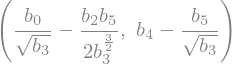

In [89]:
linear_term, const_term

In [90]:
# Reoptimising with the constraints defined above

Promising_solution_0_limits.optimisation(constraints_eq=constraints)

/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


`gtol` termination condition is satisfied.
Number of iterations: 728, function evaluations: 8696, CG iterations: 2153, optimality: 9.58e-09, constraint violation: 4.44e-16, execution time: 1.6e+01 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b0        | 2.25877   | 2.2655    | 0.00673221    
b1        | 8.32929   | 9.09647   | 0.767184      
b2        | 61.7644   | 98.3265   | 36.5621       
b3        | 115.501   | 99.0664   | 16.4344       
b4        | 1.16175   | 1.09228   | 0.0694636     
b5        | 1.76427   | 0.918511  | 0.845763      
b6        | 0.101321  | 0.054684  | 0.0466372     



(2.26549971308303*X1/sqrt(9.09647430166454*X1**2 - 98.3264524329742*X1 + 99.066372014975) + 1.09228289397768 - 0.91851094301804/(sqrt(0.054683972642158*X1**2 + 1)*sqrt(9.09647430166454*X1**2 - 98.3264524329742*X1 + 99.066372014975)),
 {'b0': np.float64(2.265499713083035),
  'b1': np.float64(9.096474301664543),
  'b2': np.float64(98.32645243297425),
  'b3': np.float64(99.06637201497499),
  'b4': np.float64(1.0922828939776799),
  'b5': np.float64(0.91851094301804),
  'b6': np.float64(0.05468397264215799)},
 {'b0': np.float64(0.0067322091122048455),
  'b1': np.float64(0.7671842759298073),
  'b2': np.float64(36.56205694292562),
  'b3': np.float64(16.434399913487212),
  'b4': np.float64(0.06946360794538231),
  'b5': np.float64(0.845763055135345),
  'b6': np.float64(0.04663720282547398)},
 np.float64(3.420732205585842e-08))

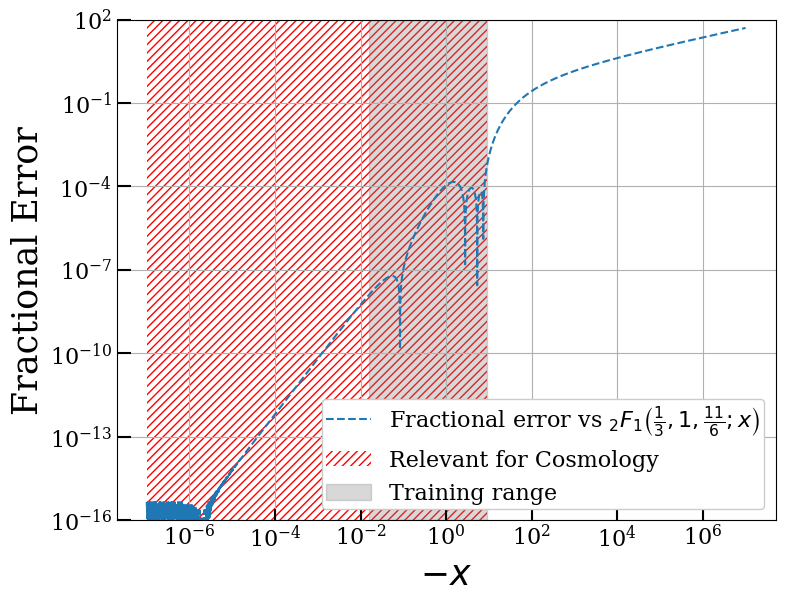

In [91]:
Promising_solution_0_limits.plot_fractional_error_hypergeom(x_val, coeff)
plt.ylim(1e-16, 1e2)
#plt.savefig("Fractional_error_hypergeom_one_limit.pdf", dpi=450)

In [92]:
import sympy as sp
str(Promising_solution_0_limits.sympy_expr)
#Promising_solution_0_limits.sympy_expr

'X1*b0/sqrt(X1**2*b1 - X1*b2 + b3) + b4 - b5/(sqrt(X1**2*b6 + 1)*sqrt(X1**2*b1 - X1*b2 + b3))'

In [ ]:
# Modification for the upper limit is not implemented automatically,
# (very hard), so we have to do it manually.

#manual = 'b1 / (X1**2*b2 - (X1*b3 / sqrt(X1**2*b4 + 1)) + (b5 / (X1**2*b4 + 1)) + 1)**(1/6)'
manual_run_III = 'b1/sqrt(X1**2*b2 - X1*b3 + b4)**(1/3) - b5/sqrt(X1**2*b6 + 1)**(1/3)'
#manual = str(Promising_solution_0_limits.sympy_expr)


# Another computation of the expansion, so that new constraint and parameters
# are updated

from symreg import Promising_solution
#Manual_limiting_test = Promising_solution(sp.parsing.sympy_parser.parse_expr(manual),  (x_prime_dstrn_train, target_train), Promising_solution_0_limits.modified_parameters)
Manual_limiting_test = Promising_solution(sp.parsing.sympy_parser.parse_expr(manual_run_III),  (x_prime_dstrn_train, target_train), Promising_solution_0_limits.original_solution, initial_parameters=Promising_solution_0_limits.modified_parameters)
constraints_man, const_term_man, linear_term_man = Manual_limiting_test.generate_constraints_from_expansion()

In [94]:
def create_arbitrary_constraint(expression_string: str, 
                                target_value: float, 
                                full_param_symbols: List[sp.Symbol],
                                constraint_type: str = 'eq') -> Dict[str, Any]:
    """Creates a single, correctly formatted and numerically robust constraint.

    This helper function takes a user-defined mathematical expression as a string
    and converts it into a constraint dictionary. The function it returns is
    "defensive," meaning it will catch numerical errors (inf/NaN) and return a
    large penalty, preventing the optimizer from crashing.

    Args:
        expression_string (str):
            The mathematical condition, e.g., "b1 + b2" or "b3 / b4".
        target_value (float):
            The value the expression should be constrained against.
        full_param_symbols (List[sp.Symbol]):
            The complete, ordered list of sympy.Symbol objects being used in the
            main optimization routine.
        constraint_type (str, optional):
            The type of constraint, 'eq' (equality) or 'ineq' (inequality).
            Defaults to 'eq'.

    Returns:
        Dict[str, Any]: A constraint dictionary ready for `scipy.optimize.minimize`.
    """
    if constraint_type not in ['eq', 'ineq']:
        raise ValueError("constraint_type must be either 'eq' or 'ineq'.")
        
    local_symbol_dict = {str(s): s for s in full_param_symbols}
    parsed_expr = sp.parse_expr(expression_string, local_dict=local_symbol_dict)
    constraint_expr = parsed_expr - target_value
    constraint_lambda = sp.lambdify(full_param_symbols, constraint_expr, 'numpy')
    
    # --- DEFENSIVE CONSTRAINT FUNCTION ---
    # This wrapper function will be the actual constraint passed to the optimizer.
    def defensive_fun(b_values):
        try:
            # Use errstate to treat numpy warnings as errors
            with np.errstate(all='raise'):
                # Calculate the constraint violation
                violation = constraint_lambda(*b_values)
                
                # If the result is not a finite number, this region is invalid.
                if not np.isfinite(violation):
                    # For constraints, returning a large value indicates a large violation.
                    return 1e12 
                
                return float(violation)

        except (FloatingPointError, ValueError, ZeroDivisionError):
            # If any numerical error occurs, penalize this parameter set heavily.
            return 1e12

    # Return the final constraint dictionary with the robust function.
    return {
        'type': constraint_type,
        'fun': defensive_fun
    }


manual_expression_string = "b1/b2**(1/6) - b5/b6**(1/6)"
manual_target_value =  1.437283088461

full_param_symbols = [sp.Symbol(f'b{i}') for i in range(1,7)]
print(full_param_symbols)
parameter_limit_inf_constraint = create_arbitrary_constraint(manual_expression_string, manual_target_value, full_param_symbols ,constraint_type='eq')

constraints_man.append(parameter_limit_inf_constraint)

[b1, b2, b3, b4, b5, b6]


In [95]:
# We can create dummy initialisation parameters, 
# if those modified produce suboptimal results, but
# check if the b

initial_params_second_opt = {
    'b1': 1.0,
    'b2': 1.0,
    'b3': 1.0,  # Start smaller for nested terms
    'b4': 10,
    'b5':1.0,
    'b6':10.0
}
Manual_limiting_test.optimisation( constraints_eq=constraints_man)

/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


The maximum number of function evaluations is exceeded.
Number of iterations: 10000, function evaluations: 71351, CG iterations: 20126, optimality: 2.22e-03, constraint violation: 1.21e-11, execution time: 1.1e+02 s.
Optimization did not converge: The maximum number of function evaluations is exceeded.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b1        | 9.09647   | 4.56585   | 4.53062       
b2        | 98.3265   | 95.0206   | 3.30584       
b3        | 99.0664   | 97.4791   | 1.58727       
b4        | 1.09228   | 172.86    | 171.768       
b5        | 0.918511  | 0.934517  | 0.0160065     
b6        | 0.054684  | 5.65594   | 5.60125       



(4.56585307715369/(95.0206115615549*X1**2 - 97.479104504507*X1 + 172.860446557237)**(1/6) - 0.93451749035169/(5.65593516015366*X1**2 + 1)**(1/6),
 {'b1': np.float64(4.565853077153694),
  'b2': np.float64(95.0206115615549),
  'b3': np.float64(97.47910450450703),
  'b4': np.float64(172.86044655723734),
  'b5': np.float64(0.9345174903516903),
  'b6': np.float64(5.655935160153662)},
 {'b1': np.float64(4.530621224510849),
  'b2': np.float64(3.305840871419349),
  'b3': np.float64(1.587267510467953),
  'b4': np.float64(171.76816366325966),
  'b5': np.float64(0.016006547333650256),
  'b6': np.float64(5.6012511875115045)},
 np.float64(0.25482649269908925))

<Axes: xlabel='$-x$', ylabel='Fractional Error'>

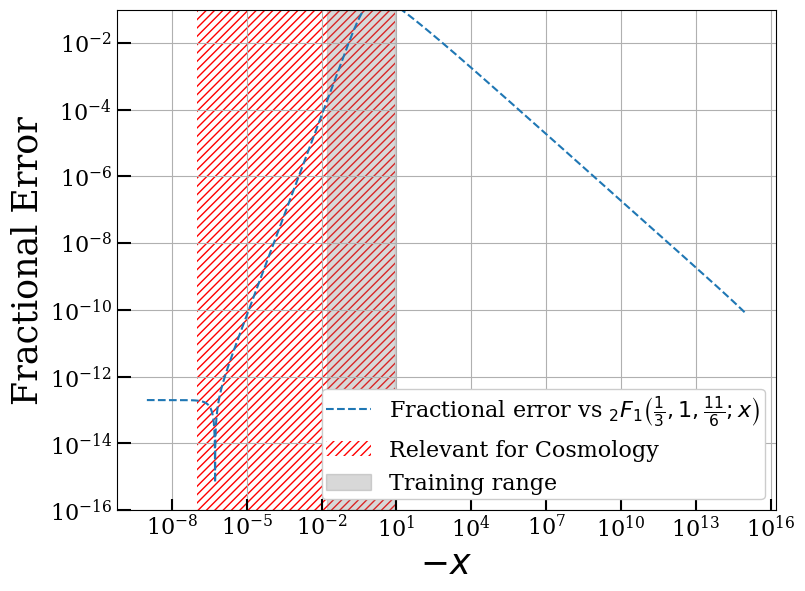

In [96]:
x_validation = -1.0 * np.geomspace(10**(-9),10**15, 10000)

Manual_limiting_test.plot_fractional_error_hypergeom(x_validation, coeff)
#plt.savefig('Fractional_error_hypergeom.pdf', dpi=450)

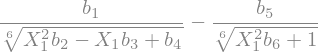

In [97]:
Manual_limiting_test.sympy_expr

Text(0.5, 1.0, 'Hypergeometric function $_2F_1\\left(\\frac{1}{3},1,\\frac{11}{6};x\\right)$')

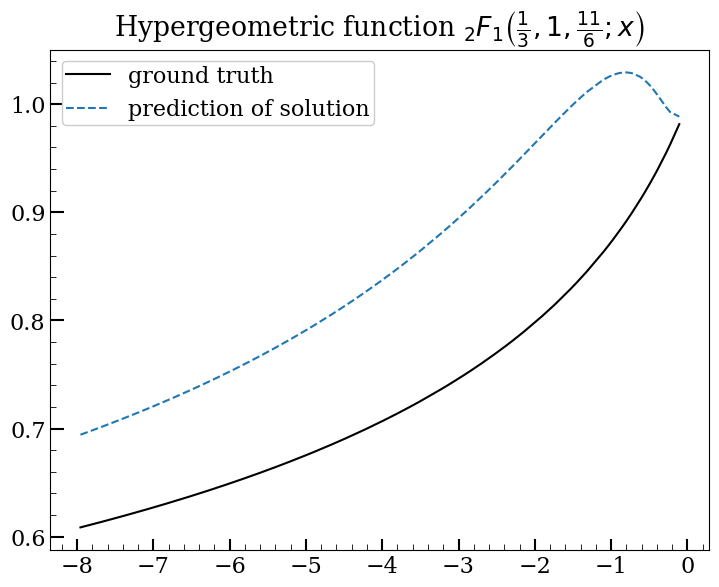

In [98]:
Manual_limiting_test.plot_comparison()
plt.title(r"Hypergeometric function $_2F_1\left(\frac{1}{3},1,\frac{11}{6};x\right)$")
#plt.savefig("hypergeom_func_growth_factor.pdf", dpi=450)

----------- Multidimensional optimisation ----------------

In [99]:
# Latin Hypercube Sampling Example for comoving distance (flat universe, negligible radiation), optimising based w.t.s. to redshift and omega_matter
from scipy.stats import qmc

sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=200)

l_bound = [0, 0.1]
u_bound = [3, 0.5]

sample = qmc.scale(sample, l_bound, u_bound)
sample

array([[0.07950237, 0.34079324],
       [2.88714918, 0.4625765 ],
       [1.07911749, 0.44567626],
       [0.56213227, 0.21051507],
       [1.87627646, 0.36808148],
       [0.3163463 , 0.18114453],
       [0.54774924, 0.10785009],
       [1.86342209, 0.12169625],
       [0.67326573, 0.33514324],
       [0.76378514, 0.4746708 ],
       [2.7528256 , 0.23449804],
       [2.38507406, 0.30397859],
       [0.21626722, 0.30444925],
       [2.36300071, 0.31513092],
       [2.04221033, 0.27619766],
       [0.09747177, 0.17648493],
       [0.99856511, 0.38949418],
       [1.98675211, 0.12289999],
       [2.58823209, 0.49827904],
       [0.11369094, 0.2433291 ],
       [1.34658956, 0.40837777],
       [0.74554082, 0.45519828],
       [1.31338083, 0.34732504],
       [2.15489175, 0.43862147],
       [1.4696885 , 0.33395427],
       [2.84051315, 0.45303716],
       [2.29772918, 0.48819766],
       [0.87580797, 0.45656635],
       [2.92555305, 0.49556846],
       [2.69485744, 0.41271442],
       [1.

In [100]:
# Generating training data for comoving distance


from scipy.integrate import quad
from typing import Tuple


def comoving_distance(params: Tuple[float, float]) -> float:

    z, omega_m = params
    if z < 0 or not (0 < omega_m < 1):
        raise ValueError("Invalid input: z must be >= 0 and 0 < omega_m < 1")

    def inv_E(z_prime):
        return 1.0 / np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m))

    integral, _ = quad(inv_E, 0, z)
    D_C =  integral  # in Mpc
    return D_C

comoving_distances = np.array([comoving_distance(sample[i]) for i in range(len(sample))])

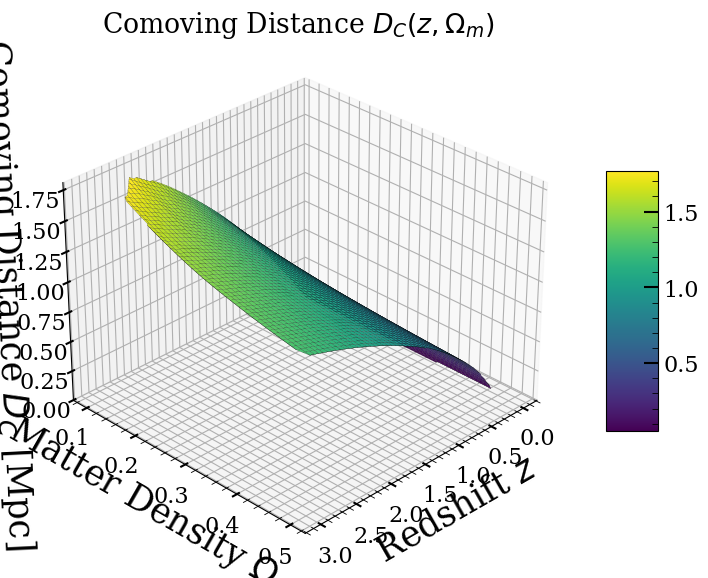

In [101]:
# Plotting the comoving distance as a function of redshift and matter density
# Just for visualize intuition

from scipy.interpolate import griddata

# Create grid
z_lin = np.linspace(sample[:, 0].min(), sample[:, 0].max(), 100)
omega_m_lin = np.linspace(sample[:, 1].min(), sample[:, 1].max(), 100)
Z_grid, OmegaM_grid = np.meshgrid(z_lin, omega_m_lin)

# Interpolate the scattered data onto the grid
D_C_grid = griddata(sample, comoving_distances, (Z_grid, OmegaM_grid), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Z_grid, OmegaM_grid, D_C_grid,
                       cmap='viridis', edgecolor='k', linewidth=0.1)

ax.set_xlabel('Redshift $z$')
ax.set_ylabel('Matter Density $\\Omega_m$')
ax.set_zlabel('Comoving Distance $D_C$ [Mpc]')
ax.set_title('Comoving Distance $D_C(z, \\Omega_m)$')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


In [102]:
# Problem problem initalisation

name = "comoving distance 2d problem"

d2_args = {
    'allowed_symbols': "add,sub,mul,pow,aq,constant,log,exp,variable",
    'epsilon': 1e-5,
    'objectives': ['mse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*5,
    'n_threads': 12,
}

Problem_comoving_distance = Problem(name, (sample, comoving_distances), (sample, comoving_distances), d2_args)

In [103]:
Problem_comoving_distance.solve()

Training data has multiple dimensions, fitting directly.
[0.02120050974190235, 5.0], 198.91, (0.221124216914 + (3.694430351257 * (0.131098300219 * X1))), 0.02
[0.012929866090416908, 6.0], 204.36, (1.866476655006 + ((-1.878975868225) * exp(((-0.551232397556) * X1)))), 0.01
[0.0014074675273150206, 7.0], 211.19, (2.123064279556 + ((-2.081037998199) * ((0.299436777830 * X2) ^ (0.172556906939 * X1)))), 0.00
[0.0012973654083907604, 8.0], 216.17, (3.677188396454 + ((-1.341253280640) * exp(((0.302319973707 * X2) ^ (0.103929698467 * X1))))), 0.00
[0.0007078276830725372, 9.0], 218.82, (0.024042245001 + ((-2.212920427322) * (((-0.486995011568) * X1) / (sqrt(1 + (((-2.024376869202) * X2) - (0.439908355474 * X1)) ^ 2))))), 0.00
[0.000553277088329196, 10.0], 224.71, (2.919057369232 + (2.907218456268 * ((((-0.575962126255) * X1) * (0.322226881981 * X2)) - exp(((-0.383080273867) * X1))))), 0.00
[0.00042111281072720885, 11.0], 226.38, ((-0.087784141302) + (1.215546250343 * (((1.024047017097 * X1) / (sq

In [104]:
n=2
Problem_comoving_distance.solutions[n].extract_and_format(), Problem_comoving_distance.solutions[n].display_expression() 

<IPython.core.display.Math object>

(('- X_{2}^{X_{1}·b_{2}}·b_{0}·b_{1}^{X_{1}·b_{2}} + b_{3}',
  {'b0': 2.081037998199008,
   'b1': 0.2994367778300102,
   'b2': 0.1725569069390076,
   'b3': 2.1230642795558197},
  -X2**(X1*b2)*b0*b1**(X1*b2) + b3),
 None)

<Axes: title={'center': 'comoving distance 2d problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

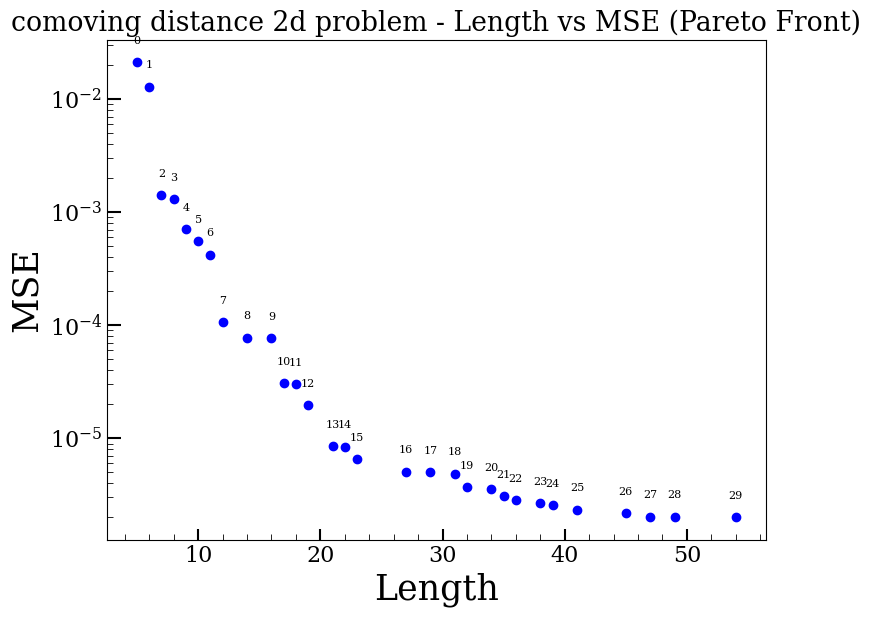

In [105]:
# Pareto front for the solutions

Problem_comoving_distance.plot_l_vs_mse()